In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [ ]:
df = pd.read_csv('/content/ZM.csv')

In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-27,143.600006,143.809998,136.169998,136.809998,136.809998,3572600
1,2022-01-28,137.580002,143.889999,134.699997,143.809998,143.809998,3682700
2,2022-01-31,146.669998,154.339996,145.899994,154.279999,154.279999,4960900
3,2022-02-01,155.229996,155.949997,150.070007,155.679993,155.679993,3316000
4,2022-02-02,155.789993,156.050003,146.580002,148.110001,148.110001,3063400


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
219,2022-12-09,72.330002,73.739998,71.853996,72.160004,72.160004,2185200
220,2022-12-12,70.910004,73.720001,70.110001,73.690002,73.690002,2836900
221,2022-12-13,77.529999,79.379997,73.010002,74.050003,74.050003,4017800
222,2022-12-14,73.650002,75.080002,72.029999,73.220001,73.220001,3570300
223,2022-12-15,71.680000,72.309998,69.809998,70.199997,70.199997,3700700


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,224.000000,224.000000,224.000000,224.000000,224.000000,2.240000e+02
mean,99.986161,102.795571,97.319947,99.946652,99.946652,4.729140e+06
std,20.457858,21.064281,19.559872,20.359775,20.359775,3.138593e+06
min,70.120003,71.464996,68.879997,69.870003,69.870003,1.834900e+06
25%,80.392502,82.254999,79.262497,80.745001,80.745001,3.148625e+06
50%,102.070003,105.265000,99.357498,102.359996,102.359996,3.987450e+06
75%,112.340002,115.446249,109.212499,113.005001,113.005001,5.394700e+06
max,155.789993,156.050003,150.070007,155.679993,155.679993,3.147540e+07


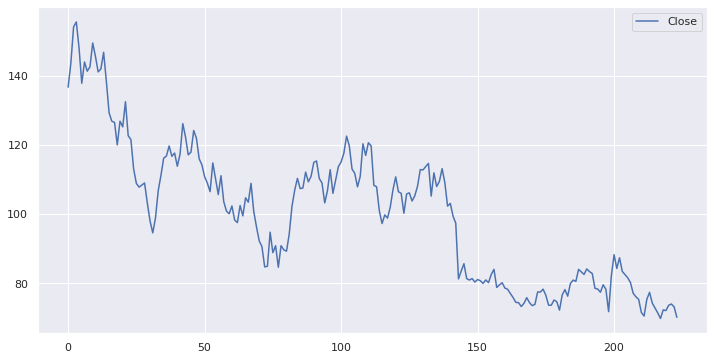

In [ ]:
df[['Close']].plot(figsize=(12,6));


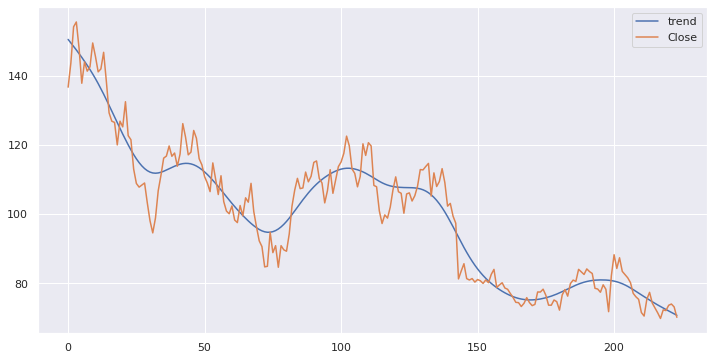

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [ ]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.7650352579443873,
 0.3979536131186878,
 0,
 223,
 {'1%': -3.460018927623594,
  '5%': -2.8745897386146817,
  '10%': -2.57372514086348},
 1175.1606230023208)

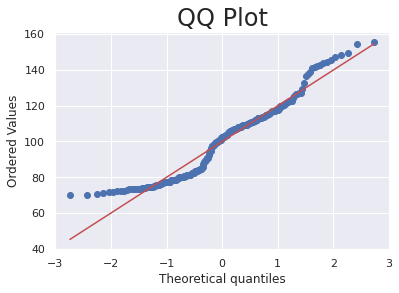

In [ ]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
df['returns'] = df.Close.pct_change(1)*100

In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)


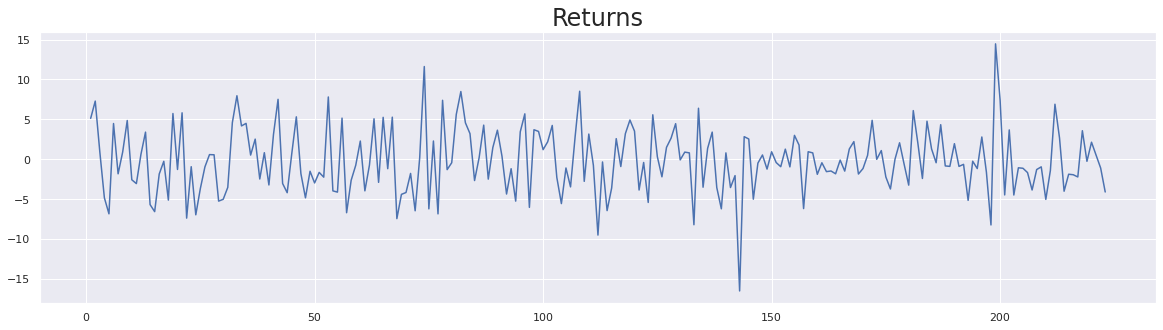

In [ ]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


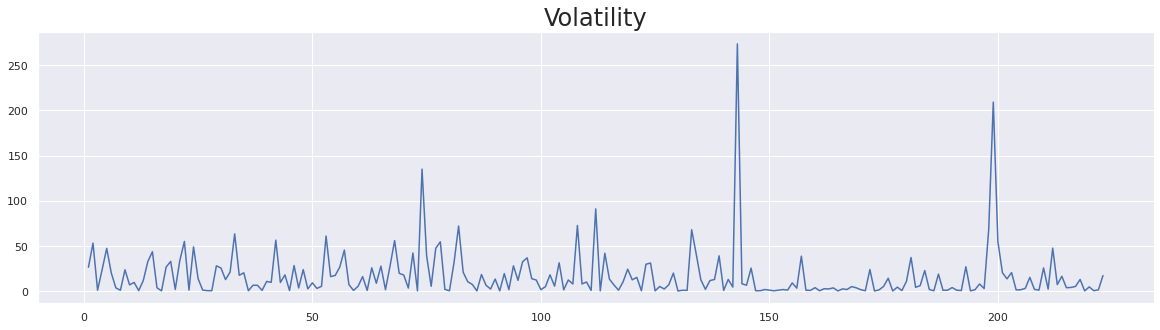

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

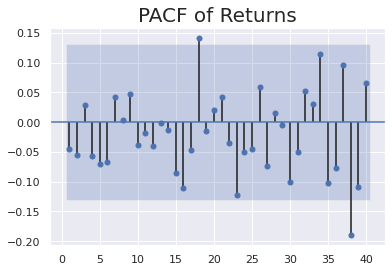

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

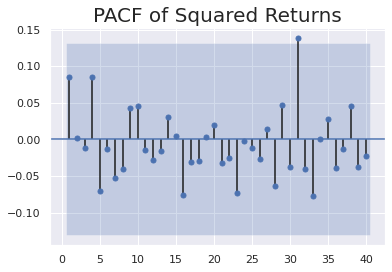

In [ ]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 18.8 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 633.354737521865
Iteration:      2,   Func. Count:     11,   Neg. LLF: 635.1524671302066
Iteration:      3,   Func. Count:     17,   Neg. LLF: 630.5452140900372
Iteration:      4,   Func. Count:     21,   Neg. LLF: 630.544572861987
Iteration:      5,   Func. Count:     24,   Neg. LLF: 630.5445728619235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.544572861987
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -630.545
Distribution:                  Normal   AIC:                           1267.09
Method:            Maximum Likelihood   BIC:                           1277.31
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2415      0.266     -0.909      0.364 [ -0.762,  0.279]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         15.2960      2.259      6.772  1.273e-11    [ 10.869, 19.723]
alpha[1]       0.0939  8.891e-02      1.056      0.291 [-8.038e-02,  0.268]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 630.5497437094048
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5318701140989
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -630.532
Distribution:                  Normal   AIC:                           1269.06
Method:            Maximum Likelihood   BIC:                           1282.69
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2297      0.307     -0.749      0.454 [ -0.831,  0.372]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         15.0139      3.301      4.548  5.409e-06    [  8.544, 21.484]
alpha[1]       0.0963  9.413e-02      1.023      0.306 [-8.818e-02,  0.281]
alpha[2]       0.0151      0.112      0.135      0.892    [ -0.204,  0.234]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 630.6301079851305
Iteration:     10,   Func. Count:     67,   Neg. LLF: 630.5318700910492
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5318700910492
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -630.532
Distribution:                  Normal   AIC:                           1271.06
Method:            Maximum Likelihood   BIC:                           1288.10
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2297      0.307     -0.749      0.454 [ -0.831,  0.371]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         15.0143      3.399      4.417  1.001e-05      [  8.352, 21.677]
alpha[1]       0.0963  9.385e-02      1.026      0.305   [-8.762e-02,  0.280]
alpha[2]       0.0151      0.112      0.135      0.893      [ -0.204,  0.234]
alpha[3]       0.0000  2.646e-02      0.000      1.000 [-5.186e-02,5.186e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 629.0476428875465
Iteration:     10,   Func. Count:    171,   Neg. LLF: 626.1939116660097
Iteration:     15,   Func. Count:    255,   Neg. LLF: 625.9545243838209
Optimization terminated successfully    (Exit mode 0)
            Current function value: 625.9541261938143
            Iterations: 19
            Function evaluations: 318
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -625.954
Distribution:                  Normal   AIC:                           1281.91
Method:            Maximum Likelihood   BIC:                           1333.02
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1787      0.368     -0.486      0.627 [ -0.900,  0.543]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.0670      6.856      0.885      0.376      [ -7.370, 19.504]
alpha[1]       0.1720      0.104      1.655  9.785e-02   [-3.166e-02,  0.376]
alpha[2]       0.0536      0.129      0.417      0.677      [ -0.199,  0.306]
alpha[3]       0.0000  3.757e-02      0.000      1.000 [-7.364e-02,7.364e-02]
alpha[4]       0.1671      0.227      0.737      0.461      [ -0.277,  0.612]
alpha[5]       0.0000      0.452      0.000      1.000      [ -0.885,  0.885]
alpha[6]       0.0000  6.440e-02      0.000      1.000      [ -0.126,  0.126]
alpha[7]       0.0000      0.232      0.000      1.000      [ -0.454,  0.454]
alpha[8]       0.0000  7.147e-02      0.000      1.000      [ -0.140,  0.140]
alpha[9]       0.2260      0.263      0.858      0.391      [ -0.290,  0.742]
alpha[10]  2.7549e-13      0.351  7.845e-13      1.000      [ -0.688,  0.688]
alpha[11]      0.0661      0.257      0.257      0.797      [ -0.438,  0.571]
alpha[12]      0.0000  9.914e-02      0.000      1.000      [ -0.194,  0.194]
alpha[13]  5.2827e-04  4.126e-02  1.280e-02      0.990 [-8.034e-02,8.139e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 630.5318751757819
Iteration:     10,   Func. Count:     57,   Neg. LLF: 630.5196784403926
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5196753445073
            Iterations: 12
            Function evaluations: 66
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -630.520
Distribution:                  Normal   AIC:                           1269.04
Method:            Maximum Likelihood   BIC:                           1282.67
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2176      0.323     -0.675      0.500 [ -0.850,  0.415]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         10.4940     23.481      0.447      0.655 [-35.527, 56.515]
alpha[1]       0.0937      0.104      0.901      0.368 [ -0.110,  0.297]
beta[1]        0.2841      1.398      0.203      0.839 [ -2.455,  3.024]
========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 630.6241008335774
Iteration:     10,   Func. Count:     67,   Neg. LLF: 630.5145964712442
Iteration:     15,   Func. Count:     96,   Neg. LLF: 630.5107766236515
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5107766236899
            Iterations: 15
            Function evaluations: 96
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -630.511
Distribution:                  Normal   AIC:                           1271.02
Method:            Maximum Likelihood   BIC:                           1288.06
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2177      0.294     -0.740      0.459 [ -0.794,  0.359]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.2408     13.034      0.786      0.432    [-15.305, 35.787]
alpha[1]       0.0929  9.778e-02      0.950      0.342 [-9.875e-02,  0.285]
beta[1]        0.2567      0.715      0.359      0.720    [ -1.146,  1.659]
beta[2]        0.0426      0.127      0.336      0.737    [ -0.206,  0.291]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 630.4141646113733
Iteration:     10,   Func. Count:     75,   Neg. LLF: 629.5232308781397
Optimization terminated successfully    (Exit mode 0)
            Current function value: 629.5227730737877
            Iterations: 14
            Function evaluations: 102
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -629.523
Distribution:                  Normal   AIC:                           1271.05
Method:            Maximum Likelihood   BIC:                           1291.49
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2050      0.340     -0.602      0.547 [ -0.872,  0.462]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          6.1009      4.998      1.221      0.222    [ -3.695, 15.897]
alpha[1]       0.1361  9.308e-02      1.462      0.144 [-4.637e-02,  0.318]
beta[1]        0.0000      0.780      0.000      1.000    [ -1.528,  1.528]
beta[2]        0.0000      0.311      0.000      1.000    [ -0.610,  0.610]
beta[3]        0.5014      0.418      1.201      0.230    [ -0.317,  1.320]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 630.5375924736782
Iteration:     10,   Func. Count:     67,   Neg. LLF: 630.5202614531875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5196753556138
            Iterations: 14
            Function evaluations: 90
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -630.520
Distribution:                  Normal   AIC:                           1271.04
Method:            Maximum Likelihood   BIC:                           1288.08
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2176      0.312     -0.697      0.486 [ -0.829,  0.394]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.4922     30.758      0.341      0.733    [-49.792, 70.776]
alpha[1]       0.0937  8.285e-02      1.130      0.258 [-6.872e-02,  0.256]
alpha[2]   7.2861e-17      0.248  2.942e-16      1.000    [ -0.485,  0.485]
beta[1]        0.2842      2.055      0.138      0.890    [ -3.743,  4.312]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 631.0689680205128
Iteration:     10,   Func. Count:     76,   Neg. LLF: 630.5250599052399
Iteration:     15,   Func. Count:    110,   Neg. LLF: 630.5196755473921
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5196755475047
            Iterations: 15
            Function evaluations: 110
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -630.520
Distribution:                  Normal   AIC:                           1273.04
Method:            Maximum Likelihood   BIC:                           1293.48
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2177      0.317     -0.687      0.492 [ -0.839,  0.403]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         10.5005     29.229      0.359      0.719      [-46.786, 67.787]
alpha[1]       0.0937  8.468e-02      1.106      0.269   [-7.231e-02,  0.260]
alpha[2]       0.0000      0.225      0.000      1.000      [ -0.440,  0.440]
alpha[3]   7.0794e-17  2.439e-02  2.903e-15      1.000 [-4.780e-02,4.780e-02]
beta[1]        0.2837      1.931      0.147      0.883      [ -3.501,  4.068]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 631.1864772500787
Iteration:     10,   Func. Count:     72,   Neg. LLF: 628.1145158588886
Optimization terminated successfully    (Exit mode 0)
            Current function value: 628.1145158591455
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -628.115
Distribution:                  Normal   AIC:                           1266.23
Method:            Maximum Likelihood   BIC:                           1283.26
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3156      0.268     -1.179      0.238 [ -0.840,  0.209]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4304      0.231      1.860  6.295e-02 [-2.324e-02,  0.884]
alpha[1]       0.1665  9.965e-02      1.670  9.482e-02 [-2.885e-02,  0.362]
gamma[1]      -0.1481  9.088e-02     -1.630      0.103  [ -0.326,2.999e-02]
beta[1]        0.8463  8.174e-02     10.353  4.066e-25    [  0.686,  1.006]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -629.595
Distribution:                  Normal   AIC:                           1269.19
Method:            Maximum Likelihood   BIC:                           1286.23
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2502      0.262     -0.953      0.340 [ -0.765,  0.264]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.5256      3.928      0.898      0.369 [ -4.173, 11.224]
alpha[1]       0.0154  6.544e-02      0.235      0.814 [ -0.113,  0.144]
gamma[1]       0.1858      0.181      1.028      0.304 [ -0.168,  0.540]
beta[1]        0.6921      0.264      2.617  8.861e-03 [  0.174,  1.210]
========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 632.8863700618233
Iteration:     10,   Func. Count:     73,   Neg. LLF: 628.3652492470071
Iteration:     15,   Func. Count:    103,   Neg. LLF: 628.3651001261512
Optimization terminated successfully    (Exit mode 0)
            Current function value: 628.3651001264543
            Iterations: 15
            Function evaluations: 103
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -628.365
Distribution:                  Normal   AIC:                           1266.73
Method:            Maximum Likelihood   BIC:                           1283.77
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3127      0.270     -1.160      0.246 [ -0.841,  0.216]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6287      0.377      1.665  9.583e-02    [ -0.111,  1.369]
alpha[1]       0.0158  5.020e-02      0.315      0.752 [-8.256e-02,  0.114]
gamma[1]       0.1600      0.102      1.568      0.117 [-4.003e-02,  0.360]
beta[1]        0.7720      0.106      7.294  3.009e-13    [  0.565,  0.979]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import FIGARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 630.9147098940875
Iteration:     10,   Func. Count:     66,   Neg. LLF: 630.5859853585712
Iteration:     15,   Func. Count:     96,   Neg. LLF: 630.5359678784048
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5358120074195
            Iterations: 18
            Function evaluations: 113
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -630.536
Distribution:                  Normal   AIC:                           1271.07
Method:            Maximum Likelihood   BIC:                           1288.11
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2314      0.427     -0.542      0.588 [ -1.068,  0.605]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         13.1263     50.488      0.260      0.795 [-85.829,1.121e+02]
phi            0.2231      6.059  3.682e-02      0.971   [-11.652, 12.098]
d              0.0000      0.526      0.000      1.000   [ -1.031,  1.031]
beta           0.1274      5.577  2.284e-02      0.982   [-10.804, 11.058]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import HARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     28,   Neg. LLF: 643.5268217268309
Iteration:     10,   Func. Count:     49,   Neg. LLF: 630.5469509108682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 630.5445727644418
            Iterations: 13
            Function evaluations: 61
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -630.545
Distribution:                  Normal   AIC:                           1267.09
Method:            Maximum Likelihood   BIC:                           1277.31
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2415      0.266     -0.909      0.364 [ -0.762,  0.279]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         15.2968      2.259      6.771  1.276e-11    [ 10.869, 19.724]
alpha[1]       0.0939  8.892e-02      1.056      0.291 [-8.039e-02,  0.268]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import APARCH


In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 639.1969861589546
Iteration:     10,   Func. Count:     83,   Neg. LLF: 628.1918348947062
Iteration:     15,   Func. Count:    121,   Neg. LLF: 7809265.514317155
Iteration:     20,   Func. Count:    158,   Neg. LLF: 627.7821818974655
Iteration:     25,   Func. Count:    194,   Neg. LLF: 627.7744251050731
Iteration:     30,   Func. Count:    228,   Neg. LLF: 627.7740387124126
Optimization terminated successfully    (Exit mode 0)
            Current function value: 627.7740387125812
            Iterations: 30
            Function evaluations: 228
            Gradient evaluations: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -627.774
Distribution:                  Normal   AIC:                           1267.55
Method:            Maximum Likelihood   BIC:                           1287.99
                                        No. Observations:                  223
Date:                Thu, Jan 26 2023   Df Residuals:                      222
Time:                        01:59:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3605      1.542     -0.234      0.815 [ -3.382,  2.661]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3824      0.531      0.720      0.472    [ -0.659,  1.424]
alpha[1]       0.0880  5.228e-02      1.684  9.216e-02 [-1.442e-02,  0.191]
gamma[1]       0.9114      0.387      2.354  1.858e-02    [  0.153,  1.670]
beta[1]        0.7817      0.104      7.512  5.809e-14    [  0.578,  0.986]
delta          0.6312      0.892      0.707      0.479    [ -1.118,  2.380]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
from scipy import stats


In [ ]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=9.316496136000914, pvalue=0.009483061536146198)

In [ ]:
jarque_bera_test.statistic

9.316496136000914

In [ ]:
jarque_bera_test.pvalue

0.009483061536146198

jarquer-bera para los retornos

In [ ]:
returns = df.returns[1:]
returns

1      5.116585
2      7.280440
3      0.907437
4     -4.862534
5     -6.866517
         ...   
219   -0.276392
220    2.120285
221    0.488534
222   -1.120867
223   -4.124562
Name: returns, Length: 223, dtype: float64

In [ ]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=8.196824597082491, pvalue=0.01659900876189746)

In [ ]:
jarque_bera_test.statistic

8.196824597082491

In [ ]:
jarque_bera_test.pvalue

0.01659900876189746

curtosis

In [ ]:
returns.kurt()

0.9673827475240886

coef. asimetria

In [ ]:
returns.skew()

0.09752077319275707

In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -15.869
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -8.722
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.66 (1%), -2.04 (5%), -1.72 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -15.551
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.033
P-value                         0.966
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        224 non-null    object 
 1   Open        224 non-null    float64
 2   High        224 non-null    float64
 3   Low         224 non-null    float64
 4   Close       224 non-null    float64
 5   Adj Close   224 non-null    float64
 6   Volume      224 non-null    int64  
 7   trend       224 non-null    float64
 8   returns     223 non-null    float64
 9   sq_returns  223 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 17.6+ KB


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [ ]:
data = pd.read_csv("/content/ZM.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-27,143.600006,143.809998,136.169998,136.809998,136.809998,3572600
1,2022-01-28,137.580002,143.889999,134.699997,143.809998,143.809998,3682700
2,2022-01-31,146.669998,154.339996,145.899994,154.279999,154.279999,4960900
3,2022-02-01,155.229996,155.949997,150.070007,155.679993,155.679993,3316000
4,2022-02-02,155.789993,156.050003,146.580002,148.110001,148.110001,3063400
...,...,...,...,...,...,...,...
219,2022-12-09,72.330002,73.739998,71.853996,72.160004,72.160004,2185200
220,2022-12-12,70.910004,73.720001,70.110001,73.690002,73.690002,2836900
221,2022-12-13,77.529999,79.379997,73.010002,74.050003,74.050003,4017800
222,2022-12-14,73.650002,75.080002,72.029999,73.220001,73.220001,3570300


In [ ]:
data = data[["Date","Close","Volume"]]


In [ ]:
data

,Date,Close,Volume
0,2022-01-27,136.809998,3572600
1,2022-01-28,143.809998,3682700
2,2022-01-31,154.279999,4960900
3,2022-02-01,155.679993,3316000
4,2022-02-02,148.110001,3063400
...,...,...,...
219,2022-12-09,72.160004,2185200
220,2022-12-12,73.690002,2836900
221,2022-12-13,74.050003,4017800
222,2022-12-14,73.220001,3570300


In [ ]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-27,136.809998,3572600,143.809998
1,2022-01-28,143.809998,3682700,154.279999
2,2022-01-31,154.279999,4960900,155.679993
3,2022-02-01,155.679993,3316000,148.110001
4,2022-02-02,148.110001,3063400,137.940002
...,...,...,...,...
219,2022-12-09,72.160004,2185200,73.690002
220,2022-12-12,73.690002,2836900,74.050003
221,2022-12-13,74.050003,4017800,73.220001
222,2022-12-14,73.220001,3570300,70.199997


In [ ]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-27,136.809998,3572600,143.809998
1,2022-01-28,143.809998,3682700,154.279999
2,2022-01-31,154.279999,4960900,155.679993
3,2022-02-01,155.679993,3316000,148.110001
4,2022-02-02,148.110001,3063400,137.940002
...,...,...,...,...
218,2022-12-08,72.360001,3056300,72.160004
219,2022-12-09,72.160004,2185200,73.690002
220,2022-12-12,73.690002,2836900,74.050003
221,2022-12-13,74.050003,4017800,73.220001


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [ ]:
price_volume_target_scaled_df

array([[0.78009559, 0.05862587, 0.86167118],
       [0.86167118, 0.06234038, 0.98368495],
       [0.98368495, 0.10546381, 1.        ],
       [1.        , 0.04996879, 0.91178193],
       [0.91178193, 0.04144667, 0.79326427],
       [0.79326427, 0.0513183 , 0.86505083],
       [0.86505083, 0.05475616, 0.83405206],
       [0.83405206, 0.02348813, 0.84861913],
       [0.84861913, 0.02463521, 0.92914593],
       [0.92914593, 0.0415715 , 0.88392969],
       [0.88392969, 0.05107539, 0.83172136],
       [0.83172136, 0.02886254, 0.84162687],
       [0.84162687, 0.02375129, 0.89768092],
       [0.89768092, 0.04078541, 0.79990677],
       [0.79990677, 0.07064658, 0.69350902],
       [0.69350902, 0.10491726, 0.6653071 ],
       [0.6653071 , 0.12145881, 0.66122835],
       [0.66122835, 0.08809231, 0.58536302],
       [0.58536302, 0.0944586 , 0.66542366],
       [0.66542366, 0.17420759, 0.64619512],
       [0.64619512, 0.1149677 , 0.7310338 ],
       [0.7310338 , 0.34406302, 0.61659483],
       [0.

In [ ]:
price_volume_target_scaled_df.shape

(223, 3)

In [ ]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((223, 2), (223, 1))

In [ ]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((144, 2), (144, 1))

In [ ]:
X_test.shape, y_test.shape

((79, 2), (79, 1))

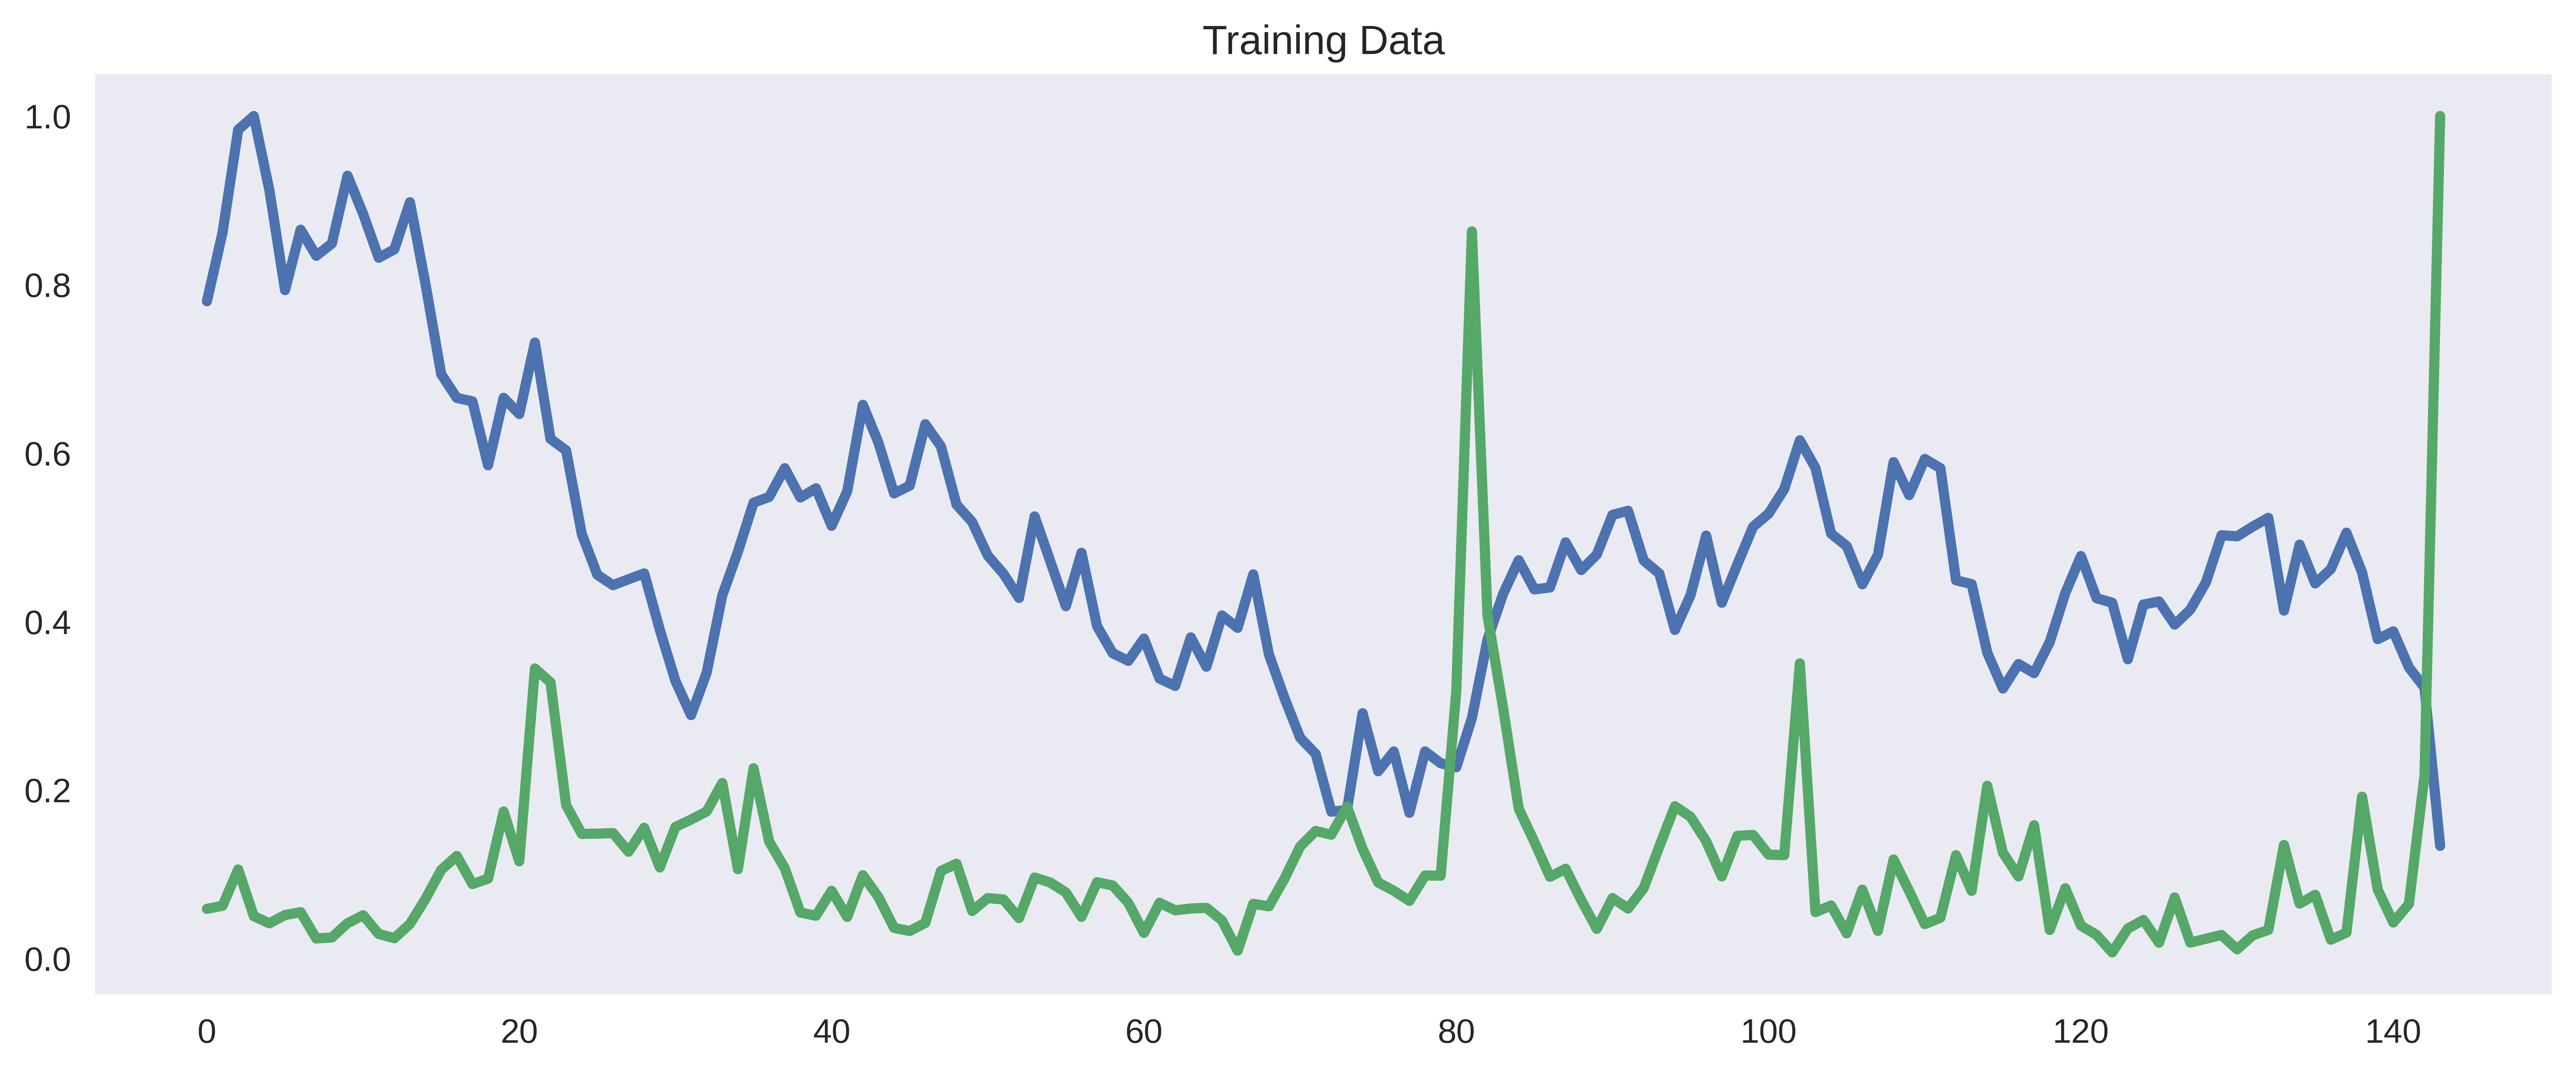

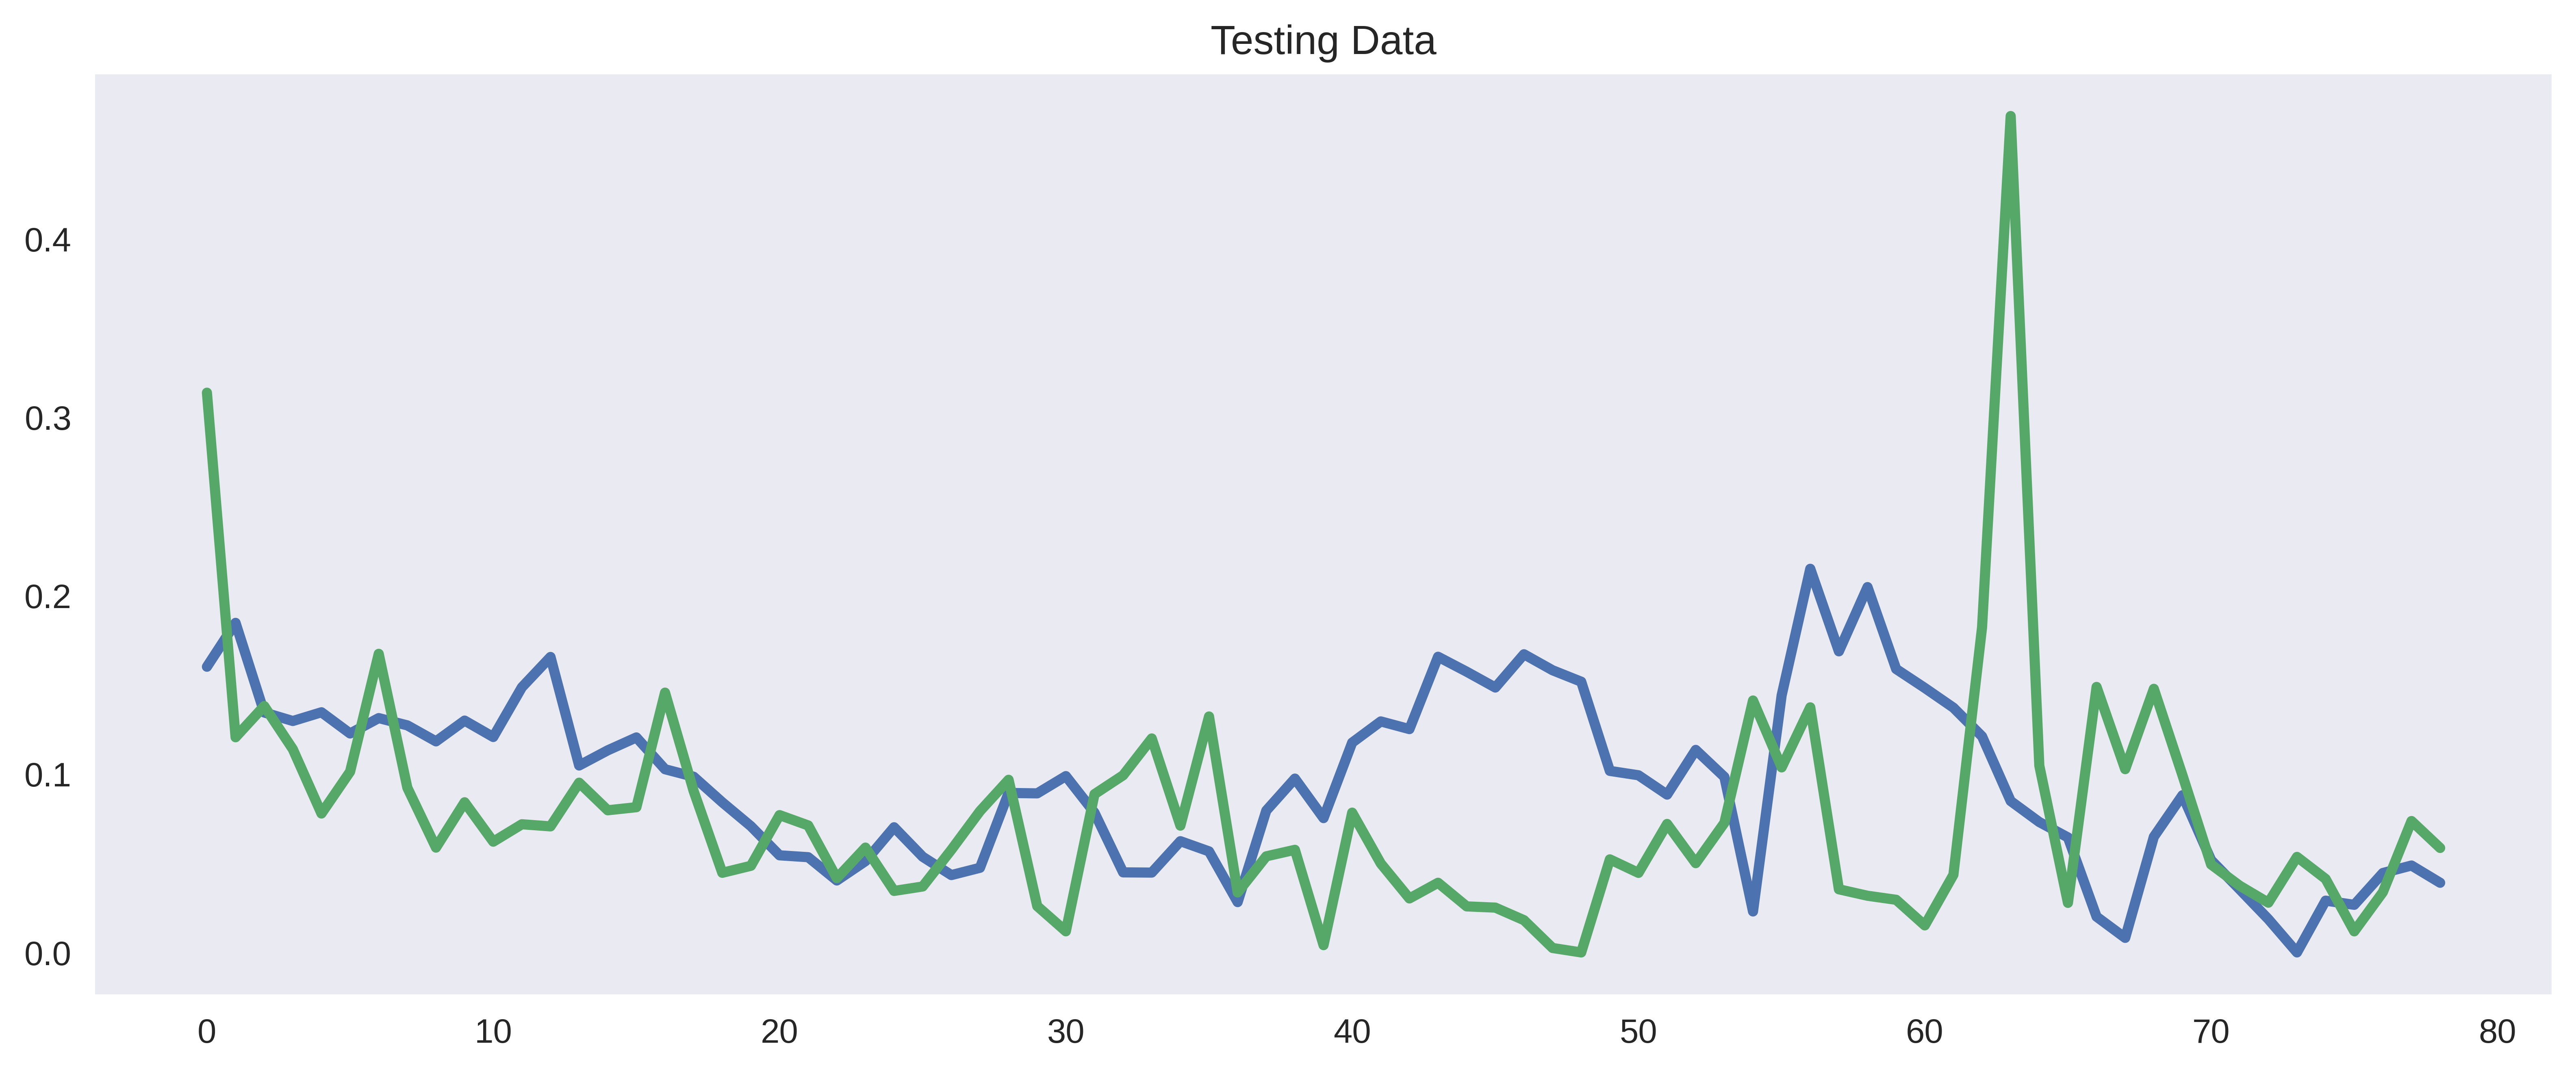

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  -2.9347180610482635


In [ ]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.70845402],
       [0.77033599],
       [0.86164734],
       [0.87588953],
       [0.80911814],
       [0.71870591],
       [0.77315648],
       [0.75063187],
       [0.76166617],
       [0.8223123 ],
       [0.78762833],
       [0.748682  ],
       [0.75638071],
       [0.79842197],
       [0.72311358],
       [0.64110412],
       [0.61911917],
       [0.61712596],
       [0.55924986],
       [0.61745768],
       [0.6048076 ],
       [0.66169219],
       [0.57525783],
       [0.56972665],
       [0.49556828],
       [0.45862216],
       [0.44920936],
       [0.45534966],
       [0.45962922],
       [0.41025975],
       [0.36251645],
       [0.3313987 ],
       [0.36943324],
       [0.43802398],
       [0.48083938],
       [0.52106175],
       [0.52917617],
       [0.55618017],
       [0.531441  ],
       [0.53989201],
       [0.50507277],
       [0.53728241],
       [0.61367748],
       [0.58025854],
       [0.53576602],
       [0.5428866 ],
       [0.59801899],
       [0.575

In [ ]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

223

In [ ]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2022-01-27
1,2022-01-28
2,2022-01-31
3,2022-02-01
4,2022-02-02
...,...
218,2022-12-08
219,2022-12-09
220,2022-12-12
221,2022-12-13


In [ ]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2022-01-27,0.780096
1,2022-01-28,0.861671
2,2022-01-31,0.983685
3,2022-02-01,1.000000
4,2022-02-02,0.911782
...,...,...
218,2022-12-08,0.029018
219,2022-12-09,0.026687
220,2022-12-12,0.044517
221,2022-12-13,0.048712


In [ ]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2022-01-27,0.780096,0.708454
1,2022-01-28,0.861671,0.770336
2,2022-01-31,0.983685,0.861647
3,2022-02-01,1.000000,0.875890
4,2022-02-02,0.911782,0.809118
...,...,...,...
218,2022-12-08,0.029018,0.138141
219,2022-12-09,0.026687,0.137345
220,2022-12-12,0.044517,0.150168
221,2022-12-13,0.048712,0.152035


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
data

,Date,Close,Volume,Target
0,2022-01-27,136.809998,3572600,143.809998
1,2022-01-28,143.809998,3682700,154.279999
2,2022-01-31,154.279999,4960900,155.679993
3,2022-02-01,155.679993,3316000,148.110001
4,2022-02-02,148.110001,3063400,137.940002
...,...,...,...,...
219,2022-12-09,72.160004,2185200,73.690002
220,2022-12-12,73.690002,2836900,74.050003
221,2022-12-13,74.050003,4017800,73.220001
222,2022-12-14,73.220001,3570300,70.199997


In [ ]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2022-01-27,136.809998,3572600,143.809998
1,2022-01-28,143.809998,3682700,154.279999
2,2022-01-31,154.279999,4960900,155.679993
3,2022-02-01,155.679993,3316000,148.110001
4,2022-02-02,148.110001,3063400,137.940002
...,...,...,...,...
219,2022-12-09,72.160004,2185200,73.690002
220,2022-12-12,73.690002,2836900,74.050003
221,2022-12-13,74.050003,4017800,73.220001
222,2022-12-14,73.220001,3570300,70.199997


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.36809998e+02, 3.57260000e+06],
       [1.43809998e+02, 3.68270000e+06],
       [1.54279999e+02, 4.96090000e+06],
       [1.55679993e+02, 3.31600000e+06],
       [1.48110001e+02, 3.06340000e+06],
       [1.37940002e+02, 3.35600000e+06],
       [1.44100006e+02, 3.45790000e+06],
       [1.41440002e+02, 2.53110000e+06],
       [1.42690002e+02, 2.56510000e+06],
       [1.49600006e+02, 3.06710000e+06],
       [1.45720001e+02, 3.34880000e+06],
       [1.41240005e+02, 2.69040000e+06],
       [1.42089996e+02, 2.53890000e+06],
       [1.46899994e+02, 3.04380000e+06],
       [1.38509995e+02, 3.92890000e+06],
       [1.29380005e+02, 4.94470000e+06],
       [1.26959999e+02, 5.43500000e+06],
       [1.26610001e+02, 4.44600000e+06],
       [1.20099998e+02, 4.63470000e+06],
       [1.26970001e+02, 6.99850000e+06],
       [1.25320000e+02, 5.24260000e+06],
       [1.32600006e+02, 1.20331000e+07],
       [1.22779999e+02, 1.15416000e+07],
       [1.21610001e+02, 7.22430000e+06],
       [1.131100

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.78009559]),
 array([0.86167118]),
 array([0.98368495]),
 array([1.]),
 array([0.91178193]),
 array([0.79326427]),
 array([0.86505083]),
 array([0.83405206]),
 array([0.84861913]),
 array([0.92914593]),
 array([0.88392969]),
 array([0.83172136]),
 array([0.84162687]),
 array([0.89768092]),
 array([0.79990677]),
 array([0.69350902]),
 array([0.6653071]),
 array([0.66122835]),
 array([0.58536302]),
 array([0.66542366]),
 array([0.64619512]),
 array([0.7310338]),
 array([0.61659483]),
 array([0.60296007]),
 array([0.50390401]),
 array([0.45530828]),
 array([0.44295535]),
 array([0.45006409]),
 array([0.45693979]),
 array([0.38993128]),
 array([0.32921575]),
 array([0.28866098]),
 array([0.33912133]),
 array([0.43083554]),
 array([0.48269436]),
 array([0.54084607]),
 array([0.54772177]),
 array([0.58186698]),
 array([0.5470225]),
 array([0.55797696]),
 array([0.51345999]),
 array([0.55448082]),
 array([0.65714958]),
 array([0.6120499]),
 array([0.55191709]),
 array([0.56112341]),


In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((156, 1, 1), (67, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
4/4 [==============================] - 11s 452ms/step - loss: 0.2722 - val_loss: 0.1035
Epoch 2/20
4/4 [==============================] - 0s 20ms/step - loss: 0.2423 - val_loss: 0.0843
Epoch 3/20
4/4 [==============================] - 0s 22ms/step - loss: 0.2013 - val_loss: 0.0607
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 0.1512 - val_loss: 0.0351
Epoch 5/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0899 - val_loss: 0.0166
Epoch 6/20
4/4 [==============================] - 0s 28ms/step - loss: 0.0343 - val_loss: 0.0286
Epoch 7/20
4/4 [==============================] - 0s 20ms/step - loss: 0.0183 - val_loss: 0.0738
Epoch 8/20
4/4 [==============================] - 0s 21ms/step - loss: 0.0374 - val_loss: 0.0652
Epoch 9/20
4/4 [==============================] - 0s 20ms/step - loss: 0.0227 - val_loss: 0.0365
Epoch 10/20
4/4 [==============================] - 0s 23ms/step - loss: 0.0164 - val_loss: 0.0233
Epoch 11/20
4/4 [==========

In [ ]:
# Make prediction
predicted = model.predict(X)

7/7 [==============================] - 1s 5ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.66283876,
 0.70708436,
 0.7747101,
 0.7838825,
 0.73464966,
 0.6699282,
 0.70893437,
 0.6920166,
 0.69995266,
 0.7442694,
 0.7192925,
 0.69074917,
 0.6961402,
 0.7268634,
 0.67351216,
 0.6167347,
 0.6019109,
 0.5997748,
 0.5604073,
 0.601972,
 0.59191906,
 0.6366059,
 0.5765302,
 0.5694771,
 0.5189084,
 0.49453354,
 0.48838308,
 0.49192026,
 0.49534723,
 0.4621933,
 0.432624,
 0.41312304,
 0.4374175,
 0.4823668,
 0.50823474,
 0.537629,
 0.5411316,
 0.5586098,
 0.5407751,
 0.5463662,
 0.52373517,
 0.5445803,
 0.59764075,
 0.5741767,
 0.5432715,
 0.5479749,
 0.5856054,
 0.5719462,
 0.5365024,
 0.52603465,
 0.5059547,
 0.49517283,
 0.4808655,
 0.52939993,
 0.50250995,
 0.47602272,
 0.5075913,
 0.46431017,
 0.44863,
 0.4442052,
 0.45711035,
 0.43397623,
 0.42980987,
 0.4577949,
 0.44080842,
 0.47055984,
 0.46333724,
 0.49476603,
 0.44800535,
 0.42284852,
 0.4003444,
 0.39117584,
 0.35906547,
 0.3599858,
 0.41423833,
 0.38150463,
 0.39260885,
 0.35847023,
 0.39260885,
 0.38600415,
 0.383

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2022-01-28
2,2022-01-31
3,2022-02-01
4,2022-02-02
5,2022-02-03
...,...
219,2022-12-09
220,2022-12-12
221,2022-12-13
222,2022-12-14


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2022-01-28,0.662839
2,2022-01-31,0.707084
3,2022-02-01,0.774710
4,2022-02-02,0.783882
5,2022-02-03,0.734650
...,...,...
219,2022-12-09,0.293011
220,2022-12-12,0.291970
221,2022-12-13,0.299951
222,2022-12-14,0.301835


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2022-01-28,0.662839,0.861671
2,2022-01-31,0.707084,0.983685
3,2022-02-01,0.774710,1.000000
4,2022-02-02,0.783882,0.911782
5,2022-02-03,0.734650,0.793264
...,...,...,...
219,2022-12-09,0.293011,0.026687
220,2022-12-12,0.291970,0.044517
221,2022-12-13,0.299951,0.048712
222,2022-12-14,0.301835,0.039040


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")